**1. Importing all the necessary libraries**

In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'

**2. Importing the dataset and analyzing it**

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('All_top_coins-updated-21.csv')

In [ ]:
df

Date        Open        High         Low       Close   Adj Close  \
0      2016-03-18  420.546997  420.546997  406.136993  409.548004  409.548004   
1      2016-03-19  409.265015  410.984009  407.230011  410.444000  410.444000   
2      2016-03-20  410.401001  414.625000  410.401001  413.755005  413.755005   
3      2016-03-21  413.417999  413.417999  410.381012  413.307007  413.307007   
4      2016-03-22  413.131989  418.375000  412.531006  418.088989  418.088989   
...           ...         ...         ...         ...         ...         ...   
19228  2021-03-14  243.429611  249.575348  232.695969  232.742828  232.742828   
19229  2021-03-15  232.605087  239.622757  219.034515  221.194412  221.194412   
19230  2021-03-16  221.165466  224.851120  211.607269  223.322723  223.322723   
19231  2021-03-17  223.348145  230.548386  217.616241  229.137543  229.137543   
19232  2021-03-18  230.329117  232.793671  228.241226  229.700745  229.700745   

            Volume Currency Name  
0      104940000.0       Bitcoin  
1       58423000.0       Bitcoin  
2       45947900.0       Bitcoin  
3       61655400.0       Bitcoin  
4       66813300.0       Bitcoin  
...            ...           ...  
19228  980555582.0          Dash  
19229  955206738.0          Dash  
19230  820597601.0          Dash  
19231  784151205.0          Dash  
19232  784068800.0          Dash  

[19233 rows x 8 columns]

In [ ]:
df.groupby(['Currency Name']).count()

Date  Open  High   Low  Close  Adj Close  Volume
Currency Name                                                  
Binance Coin   1329  1329  1329  1329   1329       1329    1329
Bitcoin        1823  1823  1823  1823   1823       1823    1823
Bitcoin Cash   1331  1331  1331  1331   1331       1331    1331
Cardano        1261  1261  1261  1261   1261       1261    1261
Chainlink      1272  1272  1272  1272   1272       1272    1272
Dash           1823  1823  1823  1823   1823       1823    1823
Ethereum       1823  1823  1823  1823   1823       1823    1823
Litecoin       1823  1823  1823  1823   1823       1823    1823
Ripple         1823  1823  1823  1823   1823       1823    1823
Stellar        1823  1823  1823  1823   1823       1823    1823
Tether         1823  1823  1823  1823   1823       1823    1823
Tron           1279  1279  1279  1279   1279       1279    1279

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19233 entries, 0 to 19232
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           19233 non-null  object 
 1   Open           19233 non-null  float64
 2   High           19233 non-null  float64
 3   Low            19233 non-null  float64
 4   Close          19233 non-null  float64
 5   Adj Close      19233 non-null  float64
 6   Volume         19233 non-null  float64
 7   Currency Name  19233 non-null  object 
dtypes: float64(6), object(2)
memory usage: 1.2+ MB


In [ ]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  19233.000000  19233.000000  19233.000000  19233.000000  19233.000000   
mean     837.968884    863.481855    811.779980    840.981261    840.981261   
std     3572.299537   3692.817363   3448.127014   3595.776068   3595.776068   
min        0.001419      0.001509      0.001091      0.001427      0.001427   
25%        0.239188      0.247620      0.229915      0.239510      0.239510   
50%        6.096200      6.329239      5.885122      6.124580      6.124580   
75%      170.301483    176.163910    163.274887    170.654999    170.654999   
max    61221.132813  61683.863281  59302.316406  61243.085938  61243.085938   

             Volume  
count  1.923300e+04  
mean   4.273775e+09  
std    1.247781e+10  
min    3.612000e+03  
25%    6.708530e+07  
50%    3.643465e+08  
75%    2.277514e+09  
max    3.509679e+11

**3. Visualizing Data**

In [ ]:
from plotly.figure_factory import create_table
table = create_table(df.head(10), colorscale = 'Viridis')
py.iplot(table)

In [ ]:
px.box(df, x = 'Currency Name', y = "Volume")

In [ ]:
px.pie(df, values = "Volume", names = "Currency Name")

In [ ]:
px.violin(df, x = "Currency Name", y = "Close")

In [ ]:
px.box(df, x = "Currency Name", y = "Close", log_y=True)

Comparing between currencies

In [ ]:
import plotly.express as px
px.scatter(df, x="Close", y="Volume", hover_data=['High','Low','Date'], color= "Currency Name", height=400)

In [ ]:
 px.scatter(df, x="Close", y="Volume", hover_data=['High','Low','Date'], color= "Currency Name", color_discrete_sequence=px.colors.qualitative.Antique, height=400, log_x = True, log_y = True)

Bitcoin Visualization

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df_bitcoin = pd.read_csv('BTC-USD (3).csv')

In [ ]:
df_bitcoin

Date          Open          High           Low         Close  \
0     2017-11-09   7446.830078   7446.830078   7101.520020   7143.580078   
1     2017-11-10   7173.729980   7312.000000   6436.870117   6618.140137   
2     2017-11-11   6618.609863   6873.149902   6204.220215   6357.600098   
3     2017-11-12   6295.450195   6625.049805   5519.009766   5950.069824   
4     2017-11-13   5938.250000   6811.189941   5844.290039   6559.490234   
...          ...           ...           ...           ...           ...   
1504  2021-12-22  48937.097656  49544.796875  48450.941406  48628.511719   
1505  2021-12-23  48626.343750  51332.339844  48065.835938  50784.539063   
1506  2021-12-24  50806.050781  51814.027344  50514.496094  50822.195313   
1507  2021-12-25  50854.917969  51176.597656  50236.707031  50429.859375   
1508  2021-12-26  50428.691406  51196.378906  49623.105469  50809.515625   

         Adj Close       Volume  
0      7143.580078   3226249984  
1      6618.140137   5208249856  
2      6357.600098   4908680192  
3      5950.069824   8957349888  
4      6559.490234   6263249920  
...            ...          ...  
1504  48628.511719  24447979559  
1505  50784.539063  28223878108  
1506  50822.195313  24367912228  
1507  50429.859375  19030650914  
1508  50809.515625  20964372926  

[1509 rows x 7 columns]

In [ ]:
#Bitcoin Area Graph
px.area(df_bitcoin, x='Date', y='Close')

In [ ]:
#Bitcoin Line graph
px.line(df_bitcoin, x='Date', y='Volume')

In [ ]:
px.violin(df_bitcoin, y='Close')

In [ ]:
#Candlestick charts

fig = go.Figure(go.Candlestick(x=df_bitcoin['Date'],
                               open=df_bitcoin['Open'],
                               high=df_bitcoin['High'],
                               low=df_bitcoin['Low'],
                               close=df_bitcoin['Close']

                               ))

In [ ]:
fig.show()

Altering the Dataset for Modelling

In [ ]:
df_bitcoin

Date          Open          High           Low         Close  \
0     2017-11-09   7446.830078   7446.830078   7101.520020   7143.580078   
1     2017-11-10   7173.729980   7312.000000   6436.870117   6618.140137   
2     2017-11-11   6618.609863   6873.149902   6204.220215   6357.600098   
3     2017-11-12   6295.450195   6625.049805   5519.009766   5950.069824   
4     2017-11-13   5938.250000   6811.189941   5844.290039   6559.490234   
...          ...           ...           ...           ...           ...   
1504  2021-12-22  48937.097656  49544.796875  48450.941406  48628.511719   
1505  2021-12-23  48626.343750  51332.339844  48065.835938  50784.539063   
1506  2021-12-24  50806.050781  51814.027344  50514.496094  50822.195313   
1507  2021-12-25  50854.917969  51176.597656  50236.707031  50429.859375   
1508  2021-12-26  50428.691406  51196.378906  49623.105469  50809.515625   

         Adj Close       Volume  
0      7143.580078   3226249984  
1      6618.140137   5208249856  
2      6357.600098   4908680192  
3      5950.069824   8957349888  
4      6559.490234   6263249920  
...            ...          ...  
1504  48628.511719  24447979559  
1505  50784.539063  28223878108  
1506  50822.195313  24367912228  
1507  50429.859375  19030650914  
1508  50809.515625  20964372926  

[1509 rows x 7 columns]

In [ ]:
columns = ["Date","Close"]
df1= pd.DataFrame(df_bitcoin, columns = columns)

In [ ]:
df1

Date         Close
0     2017-11-09   7143.580078
1     2017-11-10   6618.140137
2     2017-11-11   6357.600098
3     2017-11-12   5950.069824
4     2017-11-13   6559.490234
...          ...           ...
1504  2021-12-22  48628.511719
1505  2021-12-23  50784.539063
1506  2021-12-24  50822.195313
1507  2021-12-25  50429.859375
1508  2021-12-26  50809.515625

[1509 rows x 2 columns]

In [ ]:
prophet_df = df1.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

ds             y
0     2017-11-09   7143.580078
1     2017-11-10   6618.140137
2     2017-11-11   6357.600098
3     2017-11-12   5950.069824
4     2017-11-13   6559.490234
...          ...           ...
1504  2021-12-22  48628.511719
1505  2021-12-23  50784.539063
1506  2021-12-24  50822.195313
1507  2021-12-25  50429.859375
1508  2021-12-26  50809.515625

[1509 rows x 2 columns]

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=730)
future

ds
0    2017-11-09
1    2017-11-10
2    2017-11-11
3    2017-11-12
4    2017-11-13
...         ...
2234 2023-12-22
2235 2023-12-23
2236 2023-12-24
2237 2023-12-25
2238 2023-12-26

[2239 rows x 1 columns]

In [ ]:
forcast = m.predict(future)
forcast

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0    2017-11-09  11720.322209   7235.100321   18272.441125  11720.322209   
1    2017-11-10  11702.822201   7483.097027   18576.184343  11702.822201   
2    2017-11-11  11685.322193   7146.663146   18319.561545  11685.322193   
3    2017-11-12  11667.822184   7146.545476   17740.994231  11667.822184   
4    2017-11-13  11650.322176   6798.517710   18060.811612  11650.322176   
...         ...           ...           ...            ...           ...   
2234 2023-12-22  78753.061031  24133.735985  137126.449144  26075.695359   
2235 2023-12-23  78787.322496  23426.244473  138933.624536  25933.397169   
2236 2023-12-24  78821.583961  25966.238412  138687.605468  25851.994963   
2237 2023-12-25  78855.845425  24645.332028  139048.852944  25773.206640   
2238 2023-12-26  78890.106890  25620.880378  139416.892424  25711.680444   

        trend_upper  additive_terms  additive_terms_lower  \
0      11720.322209     1028.434555           1028.434555   
1      11702.822201      953.444256            953.444256   
2      11685.322193      850.590794            850.590794   
3      11667.822184      711.606366            711.606366   
4      11650.322176      617.869055            617.869055   
...             ...             ...                   ...   
2234  138353.263066    -1136.391871          -1136.391871   
2235  138486.146701     -926.300030           -926.300030   
2236  138619.030337     -741.377478           -741.377478   
2237  138751.913973     -503.531580           -503.531580   
2238  138884.797608     -330.072536           -330.072536   

      additive_terms_upper     weekly  weekly_lower  weekly_upper  \
0              1028.434555 -52.241246    -52.241246    -52.241246   
1               953.444256   0.527354      0.527354      0.527354   
2               850.590794  21.707027     21.707027     21.707027   
3               711.606366   2.168187      2.168187      2.168187   
4               617.869055  22.689937     22.689937     22.689937   
...                    ...        ...           ...           ...   
2234          -1136.391871   0.527354      0.527354      0.527354   
2235           -926.300030  21.707027     21.707027     21.707027   
2236           -741.377478   2.168187      2.168187      2.168187   
2237           -503.531580  22.689937     22.689937     22.689937   
2238           -330.072536 -31.004583    -31.004583    -31.004583   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0     1080.675801   1080.675801   1080.675801                   0.0   
1      952.916902    952.916902    952.916902                   0.0   
2      828.883767    828.883767    828.883767                   0.0   
3      709.438179    709.438179    709.438179                   0.0   
4      595.179118    595.179118    595.179118                   0.0   
...           ...           ...           ...                   ...   
2234 -1136.919225  -1136.919225  -1136.919225                   0.0   
2235  -948.007057   -948.007057   -948.007057                   0.0   
2236  -743.545665   -743.545665   -743.545665                   0.0   
2237  -526.221516   -526.221516   -526.221516                   0.0   
2238  -299.067953   -299.067953   -299.067953                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                            0.0                         0.0  12748.756765  
1                            0.0                         0.0  12656.266457  
2                            0.0                         0.0  12535.912987  
3                            0.0                         0.0  12379.428551  
4                            0.0                         0.0  12268.191231  
...                          ...                         ...           ...  
2234                         0.0                         0.0  77616.669160  
2235                         0.0                         0.0  77861.0

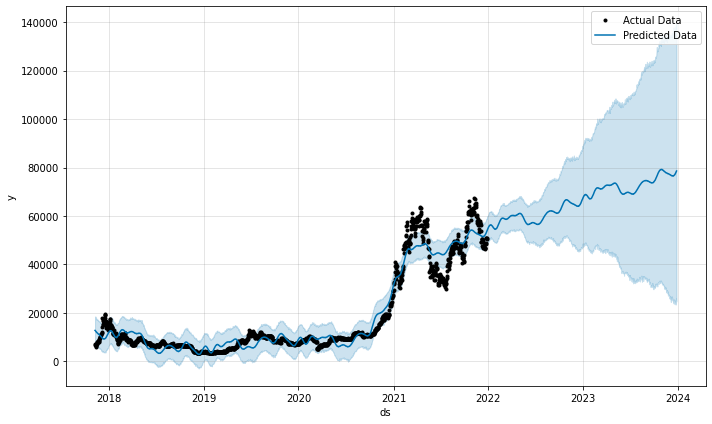

In [ ]:
figure = m.plot(forcast, xlabel = 'ds', ylabel = 'y')
plt.legend(['Actual Data', 'Predicted Data'])

In [ ]:
forcast2 = forcast.drop(['trend', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'weekly', 'weekly_lower',
          'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper'], axis = 1)
print(forcast2)

             ds    yhat_lower     yhat_upper          yhat
0    2017-11-09   7235.100321   18272.441125  12748.756765
1    2017-11-10   7483.097027   18576.184343  12656.266457
2    2017-11-11   7146.663146   18319.561545  12535.912987
3    2017-11-12   7146.545476   17740.994231  12379.428551
4    2017-11-13   6798.517710   18060.811612  12268.191231
...         ...           ...            ...           ...
2234 2023-12-22  24133.735985  137126.449144  77616.669160
2235 2023-12-23  23426.244473  138933.624536  77861.022466
2236 2023-12-24  25966.238412  138687.605468  78080.206483
2237 2023-12-25  24645.332028  139048.852944  78352.313846
2238 2023-12-26  25620.880378  139416.892424  78560.034354

[2239 rows x 4 columns]


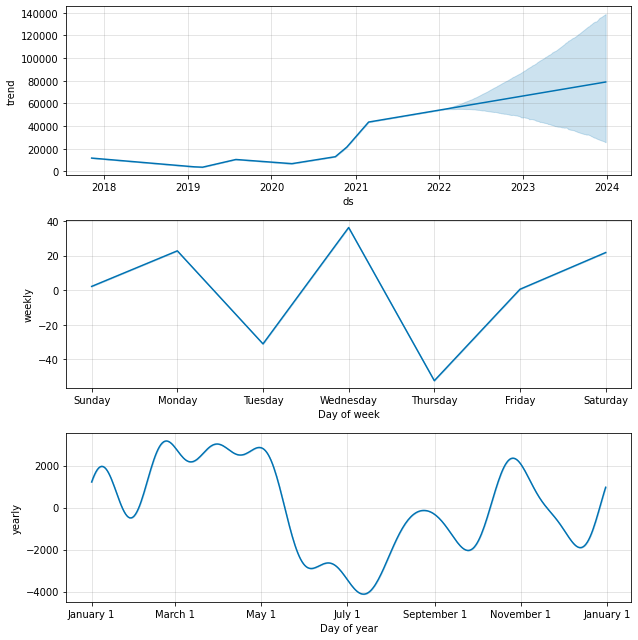

In [ ]:
figure2 = m.plot_components(forcast)

In [ ]:
data = [forcast["ds"], prophet_df["y"], forcast2["yhat"]]
headers = ["ds", "y", "yhat"]
forcast3 = pd.concat(data, axis=1, keys=headers)

In [ ]:
forcast3

ds            y          yhat
0    2017-11-09  7143.580078  12748.756765
1    2017-11-10  6618.140137  12656.266457
2    2017-11-11  6357.600098  12535.912987
3    2017-11-12  5950.069824  12379.428551
4    2017-11-13  6559.490234  12268.191231
...         ...          ...           ...
2234 2023-12-22          NaN  77616.669160
2235 2023-12-23          NaN  77861.022466
2236 2023-12-24          NaN  78080.206483
2237 2023-12-25          NaN  78352.313846
2238 2023-12-26          NaN  78560.034354

[2239 rows x 3 columns]

In [ ]:
pip install scikit-learn scipy

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
forecast_prediction=forcast3.dropna(how="any")

### Accuracy

In [ ]:
r2_score(forecast_prediction.y, forecast_prediction.yhat)

0.9398997074696636

### Bitcoin investing date suggestor

In [ ]:
df_forecast_prediction=forcast3[forcast3["ds"]>='2022-04-01'][["ds","yhat"]]

In [ ]:
df_forecast_prediction.columns

Index(['ds', 'yhat'], dtype='object')

In [ ]:
df_forecast_prediction.shape

(635, 2)

In [ ]:
df_forecast_prediction.dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [ ]:
# df_forecast_prediction["ds"]=df_forecast_prediction["ds"].dt.strftime('%Y-%m-%d')

In [ ]:
df_forecast_prediction.dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

Get the date from user for which they want the crypto prices for

In [ ]:
from datetime import datetime
input_date=input("Enter the date you want the best price for:")
input_date=datetime.strptime(input_date, '%Y-%m-%d')
while(input_date<datetime(2022,4,1)):
  print("Wrong date entered! Enter date again! ")
  input_date=input("Enter the date you want the best price for:")
  input_date=datetime.strptime(date, '%Y-%m-%d')

Enter the date you want the best price for:2022-04-05


In [ ]:
input_date

datetime.datetime(2022, 4, 5, 0, 0)

In [ ]:
from datetime import date
from datetime import timedelta
input_date=input_date.strftime("%Y-%m-%d")
closing_price=df_forecast_prediction[df_forecast_prediction["ds"]==input_date]["yhat"].values[0]
print(f"The closing price for Bitcoin on {input_date} is {closing_price} ")
print("Let's find out if you will get a better price in the next 8 days")
input_date=datetime.strptime(input_date, '%Y-%m-%d')
date_start=input_date
next_week=input_date+timedelta(days=7)
date_end=next_week
next_week_prediction=df_forecast_prediction[(df_forecast_prediction["ds"]>=date_start) & (df_forecast_prediction["ds"]<=date_end)][["ds","yhat"]]
next_week_prediction=next_week_prediction.reset_index(drop=True)
min_next_week=next_week_prediction["yhat"].min()
print(next_week_prediction.head(10))
if(closing_price<=min_next_week):
  print(f"The date you have entered has the best price. You can invest on {date_start} and the predicted closing price is {closing_price}")
elif(closing_price>min_next_week):
  suggested_price_index=next_week_prediction[["yhat"]].idxmin()
  print(suggested_price_index)
  suggested_date=next_week_prediction.iloc[suggested_price_index,0].values[0]
  suggested_price=next_week_prediction.iloc[suggested_price_index,1].values[0]
  print(f"You might end up spending more on the date you have entered. You can spend less on {(suggested_date)} and the closing price is {suggested_price}")

The closing price for Bitcoin on 2022-04-05 is 60191.1845595824 
Let's find out if you will get a better price in the next 8 days
          ds          yhat
0 2022-04-05  60191.184560
1 2022-04-06  60248.691980
2 2022-04-07  60146.994002
3 2022-04-08  60184.539321
4 2022-04-09  60190.341447
5 2022-04-10  60157.013185
6 2022-04-11  60166.997701
7 2022-04-12  60107.550941
yhat    7
dtype: int64
You might end up spending more on the date you have entered. You can spend less on 2022-04-12T00:00:00.000000000 and the closing price is 60107.5509413405
